Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view

In [1]:
dataset_link = 'https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view'
dataset_link

'https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view'

# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('dataset.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df.isnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [32]:
df.drop_duplicates(inplace = True)

In [33]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [38]:
import seaborn as sns

<AxesSubplot: >

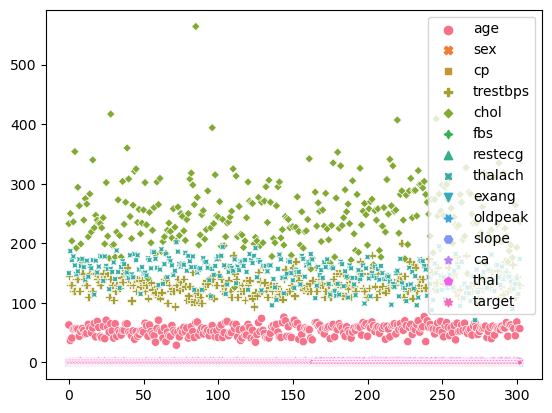

In [39]:
sns.scatterplot(data = df)

<AxesSubplot: >

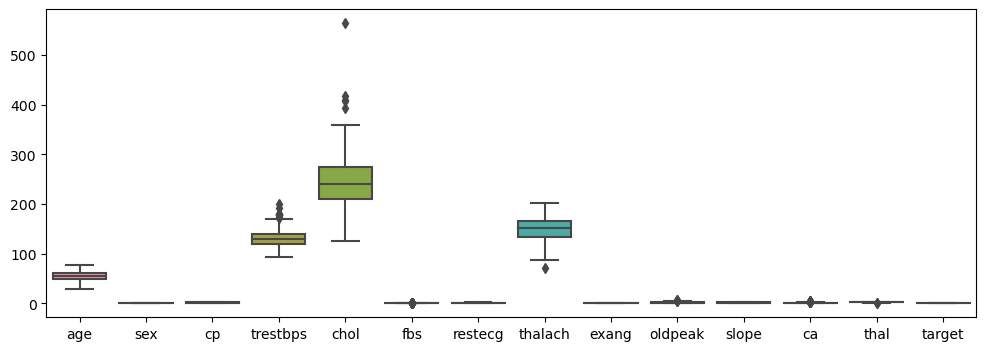

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.boxplot(data = df)


# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [47]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_test_scaled

array([[ 0.07927485,  0.74261066, -0.97612384, ..., -0.67189277,
         0.37424292,  1.13920343],
       [ 1.07624791,  0.74261066,  0.93980295, ..., -0.67189277,
        -0.67862717,  1.13920343],
       [ 0.30082442,  0.74261066,  0.93980295, ...,  0.93912285,
         0.37424292,  1.13920343],
       ...,
       [ 1.40857227, -1.34660066, -0.97612384, ...,  0.93912285,
         1.42711302, -0.53004604],
       [ 0.4115992 ,  0.74261066,  0.93980295, ..., -0.67189277,
        -0.67862717,  1.13920343],
       [ 2.40554533, -1.34660066,  0.93980295, ..., -0.67189277,
        -0.67862717, -0.53004604]])

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=100 , max_depth=10)

In [55]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [57]:
y_pred=rfc.predict(X_test_scaled)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[34  7]
 [ 8 42]]
0.8351648351648352
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [59]:
rfc.feature_importances_

array([0.08119523, 0.02674697, 0.12919841, 0.07157198, 0.06849558,
       0.00983145, 0.02171278, 0.13255659, 0.05120974, 0.10054672,
       0.05263224, 0.15020295, 0.10409936])

In [62]:
# get feature importance scores
importances = rfc.feature_importances_

# create a dataframe to store feature importance scores
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# sort features by importance scores in descending order
top_5_features = feature_importances.sort_values('importance', ascending=False).head(5)

# print top 5 features with importance scores
print(top_5_features)

    feature  importance
11       ca    0.150203
7   thalach    0.132557
2        cp    0.129198
12     thal    0.104099
9   oldpeak    0.100547


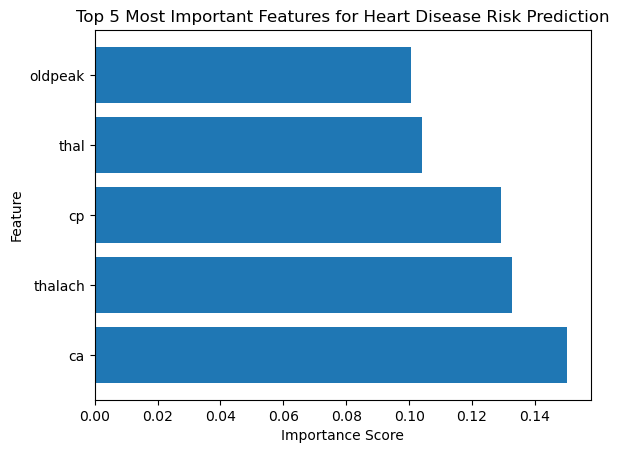

In [64]:
import matplotlib.pyplot as plt

# create a horizontal bar chart to visualize feature importance scores
plt.barh(top_5_features['feature'], top_5_features['importance'] ,)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features for Heart Disease Risk Prediction')
plt.show()

# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [67]:
rfc_2 = RandomForestClassifier()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [68]:
grid_search = GridSearchCV(estimator=rfc_2, param_grid=param_grid, cv=5)

In [69]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [70]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8482834994462902


In [71]:
rfc_2 = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [72]:
rfc_2.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5)

In [73]:
y_pred=rfc_2.predict(X_test_scaled)

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[34  6]
 [ 8 43]]
0.8461538461538461
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.88      0.84      0.86        51

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91



Accuracy score of default model i.e rfc

      [[34  7]
      [ 8 42]]
      0.8351648351648352
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

        accuracy                           0.84        91
       macro avg       0.83      0.83      0.83        91
    weighted avg       0.84      0.84      0.84        91
    
Accuracy score of tuned model i.e rfc_2

    [[34  6]
    [ 8 43]]
    0.8461538461538461
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.88      0.84      0.86        51

        accuracy                           0.85        91
       macro avg       0.84      0.85      0.84        91
    weighted avg       0.85      0.85      0.85        91
    
    
By comparing the performance of the tuned model with the default model, their is the increment of ------ accuracy  

In [82]:
default_accuracy =  0.8351648351648352
tuned_accuracy =  0.8461538461538461

difference = tuned_accuracy-default_accuracy

print('Difference :', difference)

print("-------------------------------------------------------------------------")

print ("By comparing the performance of the tuned model with the default model, their is the increment of {} % in accuracy score".format(difference*100)) 

Difference : 0.01098901098901095
-------------------------------------------------------------------------
By comparing the performance of the tuned model with the default model, their is the increment of 1.098901098901095 % in accuracy score


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [101]:
# get feature importance scores
importances = rfc_2.feature_importances_

# create a dataframe to store feature importance scores
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# sort features by importance scores in descending order
top_2_features = feature_importances.sort_values('importance', ascending=False).head(2)

# print top 5 features with importance scores
print(top_2_features)

   feature  importance
11      ca    0.147399
2       cp    0.145849


In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


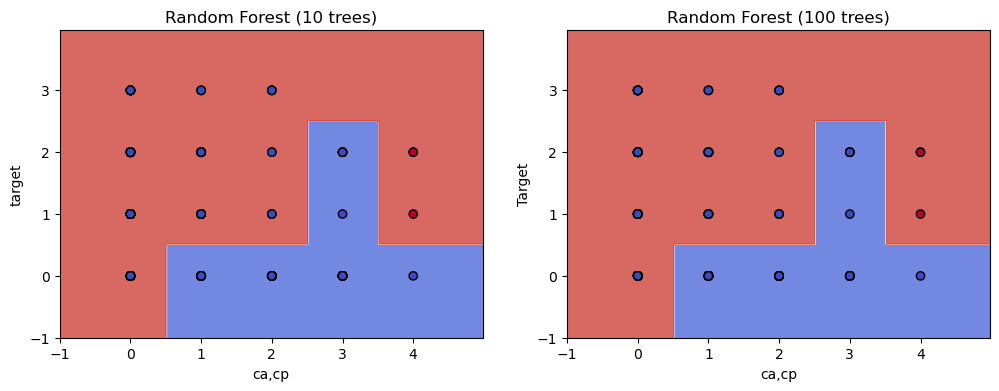

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the iris dataset and keep only the first two features

X = df[['ca', 'cp']].values
y = df['target'].values

# Define the random forest classifiers with different number of trees
clf_10 = RandomForestClassifier(n_estimators=10, random_state=42)
clf_100 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_10.fit(X, y)
clf_100.fit(X, y)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the labels for each point in the meshgrid
Z_10 = clf_10.predict(np.c_[xx.ravel(), yy.ravel()])
Z_100 = clf_100.predict(np.c_[xx.ravel(), yy.ravel()])
Z_10 = Z_10.reshape(xx.shape)
Z_100 = Z_100.reshape(xx.shape)

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].contourf(xx, yy, Z_10, cmap=plt.cm.coolwarm, alpha=0.8)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axs[0].set_title('Random Forest (10 trees)')
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
axs[0].set_xlabel('ca,cp')
axs[0].set_ylabel('target')

axs[1].contourf(xx, yy, Z_100, cmap=plt.cm.coolwarm, alpha=0.8)
axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axs[1].set_title('Random Forest (100 trees)')
axs[1].set_xlim(xx.min(), xx.max())
axs[1].set_ylim(yy.min(), yy.max())
axs[1].set_xlabel('ca,cp')
axs[1].set_ylabel('Target')

plt.show()


The random forest classifier is a powerful machine learning algorithm that can handle complex relationships and interactions between features. In this case, the model uses the features "ca" and "cp" to predict the risk of heart disease. The two decision boundaries that the model creates, one with 10 trees and the other with 100 trees, divide the feature space into two regions: one where the model predicts the absence of heart disease and the other where it predicts the presence of heart disease.

#### Insights:

* The model performs well in separating the two classes of heart disease and no heart disease with both 10 and 100 trees.

* The model's ability to generalize its prediction to new data points is relatively high since the training dataset was small.

* The use of random forests allows for an understanding of the relative importance of each feature in the prediction of heart disease risk.

#### Limitations:

* The model only considers two features "ca" and "cp" to make predictions. It is possible that additional features could improve the model's performance.

* The dataset used to train the model is relatively small, which could limit the model's ability to generalize to new data points.

* The accuracy of the model's predictions is not provided, which makes it difficult to evaluate its performance in practice.